<a href="https://colab.research.google.com/github/connorpheraty/LSDS_Intro/blob/master/Copy_of_LSDS_Intro_Assignment_3_Statistics_of_Forest_Fires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Forest Fire Statistics

![Forest fire](https://www.publicdomainpictures.net/pictures/220000/velka/forest-fire.jpg)

Forest fires are a sadly timely topic, but data can help us better understand and perhaps manage them in future. In this assignment you'll look at a data set of forest fires in Portugal during 2007 - this is a real research dataset, and you can [read more about it](https://archive.ics.uci.edu/ml/datasets/Forest+Fires) though you do not need to for this assignment.

For our purposes, the main thing that you need to understand are the attributes in the data.

1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84 

Most of these features are numeric - this means we can do things like look at their mean, median, mode, and plot histograms. They have technical sounding names, but generally refer to meteorological data (i.e. the weather).

For the discrete features we can still draw histograms (as in the lecture notebook). X and Y are already integer values - month and day do have natural order, but if you want to use them you may want to translate them from strings to numbers (hint - you can build a dict that maps them, and loop over to apply it).

## Exercise 1 - Load the data and take a peek

The data is accessible as a CSV at the URL: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv

You want to load this into a dataframe, so you can then look at the variables and perform descriptive statistics.

After you load it, verify that you've got it working by printing the first five rows of data.

In [21]:
import pandas as pd
import io
import requests
url="https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv"
s=requests.get(url).content
data =pd.read_csv(io.StringIO(s.decode('utf-8')))
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [22]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Exercise 2 - Explore and summarize the data

Now that you've got the data, take a deeper look at it - the description above gives the overall range (from minimum to maximum), but look at the other core statistics. You should pick three variables you want to look at - two continuous, and one discrete, and for each you should calculate the mean and median.

Don't use the magic built-in functions of pandas or other libraries - write your own functions to calculate mean and median (you can of course refer to the lecture notebooks for help). This is a good exercise both to practice coding and reinforce the statistical concepts.

For each of the three variables you look at, answer the following questions (as comments in your code):

- Is the median larger or smaller than the mean?
- What does that tell you about how the variable is distributed?
- (For the discrete variable only) What is the mode?

Hint - it may help to draw a histogram to look at the variable and really get a feel for it.

Another hint - part of this exercise is making sure you can distinguish between continuous and discrete variables, so take some time to think through your choice of variables.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline

In [0]:
def mean(column):
    return sum(column) / len(column)

In [0]:
def median(column):
    total_count = len(column)
    
    sorted_col_list = sorted(list(column))
    
    
    if len(column) % 2 == 0:
        
        med_high_index = int((total_count / 2)) 
        med_low_index = int((total_count / 2) - 1)
        
        med_high_num = sorted_col_list[med_high_index]
        med_low_num = sorted_col_list[med_low_index]
        
        return (med_high_num + med_low_num) / 2  
    else:
        med_index = int(total_count / 2)
        return sorted_col_list[med_index]

In [0]:
def meanMedian(column):
    
    # Mean
    
    col_mean = mean(column)
    print('The mean for this category is: ' + str(col_mean))
   
    # Median
    
    col_median = median(column)
    print('The median for is: ' + str(col_median))

In [27]:
meanMedian(data['DMC'])
print('\n')
meanMedian(data['ISI'])

# The median for the DMC and ISI category is slightly lower than the mean. This indicates there may be high values on the right end of the distribution that are skewing the mean right. 
# Per review of a histogram plot of the DMC and ISI values, there appears to be higher values on the right side of the distribution that are indeed skewing the mean right.

The mean for this category is: 110.87234042553195
The median for is: 108.3


The mean for this category is: 9.021663442940042
The median for is: 8.4


In [0]:
#This function can find the mode for both the month and day column (discrete variable)

def monthDayMode(column):
  column_dict = Counter(column)
  mode = max(column, key=column_dict.get)
  print(column_dict)
  print('The mode for this column is: ' + str(mode))

In [58]:
monthDayMode(data['month'])

Counter({'aug': 184, 'sep': 172, 'mar': 54, 'jul': 32, 'feb': 20, 'jun': 17, 'oct': 15, 'apr': 9, 'dec': 9, 'jan': 2, 'may': 2, 'nov': 1})
The mode for this column is: aug


In [0]:
# This function is designed to create histograms from 1-D arrays.

import plotly.plotly as py
import plotly.tools as tls

def make_hist(column):

  forest_fire = column
  plt.hist(forest_fire)
  plt.xlabel("Value")
  plt.ylabel("Frequency")

  fig = plt.plot()

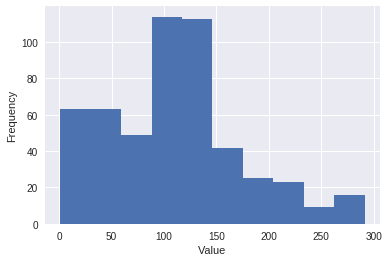

In [31]:
# This is a histogram depicting the values of the DMC column on the x-axis and the frequency of the values on the y-axis.

make_hist(data['DMC'])

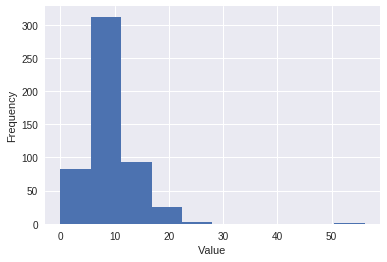

In [32]:
# This is a histogram depicting the values of the ISI column on the x-axis and the frequency of the values on the y-axis.


make_hist(data['ISI'])

## Exercise 3 - Simulate more data!

There are many more things that could be done with this data, but for now we've not learned about hypothesis testing or inferential statistics. So, one fun thing to do is - make more data!

How do we do that? We can use the same `random` module demonstrated in lecture, and repeatedly sample our data. This is related to the Monte Carlo method used to demonstrate the central limit theorem. In this setting, such simulations could then be applied to Bayesian methods - another topic for another time.

For the same three variables that you looked at in exercise 2, you should do the following:

1. Generate a *new* variable based on taking values at random from the original one - make the new variable have at least 10 times as many observations as the original
2. Calculate the mean, median, and mode of the new variable (it's okay to use prewritten functions for this)
3. Compare your results to what you saw in exercise 2 - it should be very similar

Once you're done, look back at your code. Chances are you learned things as you wrote it, and you can revisit it to clean it up a bit. Maybe put pieces of code you use multiple times in a function, or add some explanatory comments so anyone reading (including "future you") has a clearer understanding of what you did.

In [0]:
import random

In [0]:
new_sample_ISI = np.random.choice(data['ISI'],10000)

In [48]:
meanMedian(new_sample_ISI)

# The median for the ISI column is the same number from our original dataset while the mean is slightly higher.

The mean for this category is: 9.072030000000048
The median for is: 8.4


In [49]:
# I will run ISI through my mode function since I did not do it as part of exercise 2.

monthDayMode(data['ISI'])

Counter({9.6: 23, 7.1: 21, 6.3: 20, 7.0: 17, 8.4: 17, 6.2: 16, 9.2: 15, 7.5: 14, 9.0: 12, 7.8: 12, 8.1: 12, 14.3: 12, 8.5: 9, 10.6: 8, 12.5: 8, 13.9: 7, 8.9: 7, 17.0: 7, 8.6: 7, 9.9: 7, 12.2: 6, 15.9: 6, 5.0: 6, 2.6: 6, 6.8: 6, 1.9: 6, 6.7: 5, 3.8: 5, 11.0: 5, 8.8: 5, 7.7: 5, 7.2: 5, 13.8: 5, 13.5: 5, 10.2: 5, 7.6: 5, 17.7: 5, 14.7: 4, 10.7: 4, 20.3: 4, 4.1: 4, 3.2: 4, 10.4: 4, 8.0: 4, 5.7: 4, 9.5: 4, 6.5: 4, 7.4: 4, 8.2: 4, 18.0: 4, 10.1: 4, 0.8: 3, 3.0: 3, 5.8: 3, 5.3: 3, 4.8: 3, 5.2: 3, 17.9: 3, 2.7: 3, 11.9: 3, 3.5: 3, 12.3: 3, 6.4: 3, 11.4: 3, 12.0: 3, 14.0: 3, 16.8: 3, 14.1: 3, 11.3: 3, 5.1: 2, 8.7: 2, 2.1: 2, 2.9: 2, 2.8: 2, 3.9: 2, 13.2: 2, 11.1: 2, 15.1: 2, 5.5: 2, 13.7: 2, 0.4: 2, 3.7: 2, 5.6: 2, 20.0: 2, 22.6: 1, 56.1: 1, 1.5: 1, 0.7: 1, 16.5: 1, 6.6: 1, 7.9: 1, 2.3: 1, 12.9: 1, 14.4: 1, 13.0: 1, 14.6: 1, 22.7: 1, 2.0: 1, 3.4: 1, 12.7: 1, 5.4: 1, 11.6: 1, 0.0: 1, 2.2: 1, 8.3: 1, 4.0: 1, 12.1: 1, 3.3: 1, 9.8: 1, 9.7: 1, 16.3: 1, 16.7: 1, 1.8: 1, 7.3: 1, 4.7: 1, 9.4: 1, 10.8: 

In [50]:
monthDayMode(new_sample_data)

# The mode for the ISI column is the same as our original dataset.

Counter({9.6: 476, 7.1: 430, 6.3: 359, 7.0: 339, 8.4: 330, 6.2: 295, 9.2: 294, 7.5: 260, 7.8: 244, 14.3: 239, 8.1: 236, 9.0: 235, 8.5: 157, 17.0: 148, 12.5: 143, 10.6: 143, 8.6: 142, 13.9: 139, 9.9: 138, 8.9: 133, 15.9: 133, 6.8: 120, 1.9: 118, 2.6: 116, 17.7: 107, 11.0: 101, 13.5: 100, 5.0: 100, 7.6: 98, 10.2: 98, 7.7: 98, 12.2: 98, 13.8: 97, 3.8: 96, 8.8: 94, 10.1: 91, 6.7: 89, 5.7: 84, 8.0: 84, 8.2: 83, 7.2: 81, 9.5: 80, 7.4: 77, 6.5: 76, 18.0: 75, 10.4: 73, 6.4: 72, 4.8: 70, 2.7: 70, 14.7: 69, 4.1: 68, 17.9: 68, 10.7: 66, 3.2: 65, 3.0: 65, 12.3: 63, 11.4: 63, 14.1: 62, 20.3: 62, 0.8: 62, 5.2: 58, 3.5: 56, 0.4: 56, 12.0: 55, 14.0: 55, 11.9: 53, 11.3: 52, 5.3: 52, 16.8: 52, 5.8: 52, 13.2: 49, 3.9: 43, 2.9: 41, 5.5: 39, 13.7: 37, 15.1: 36, 20.0: 36, 11.1: 36, 3.7: 33, 2.1: 33, 8.7: 33, 2.8: 32, 14.6: 31, 5.6: 30, 5.1: 30, 3.4: 27, 56.1: 26, 7.3: 25, 9.4: 24, 1.5: 24, 12.1: 24, 1.1: 23, 22.7: 23, 10.8: 23, 0.0: 22, 1.8: 22, 16.7: 21, 12.9: 21, 5.4: 21, 22.6: 20, 16.3: 20, 2.0: 20, 2.2:

In [0]:
new_sample_DMC = np.random.choice(data['DMC'], 10000)

In [52]:
meanMedian(new_sample_DMC)

# The median for the DMC column is the same number from our original dataset while the mean is slightly higher.

The mean for this category is: 111.02083000000185
The median for is: 108.3


In [53]:
# I will run DMC through my mode function since I did not do it as part of exercise 2.

monthDayMode(data['DMC'])

Counter({99.0: 10, 129.5: 9, 142.4: 8, 231.1: 8, 126.5: 7, 35.8: 7, 108.3: 7, 137.0: 7, 108.4: 7, 51.3: 6, 145.4: 6, 139.4: 6, 117.9: 6, 149.3: 6, 85.1: 6, 99.6: 6, 111.2: 6, 152.6: 6, 25.4: 6, 102.3: 6, 181.1: 6, 133.3: 5, 52.2: 5, 121.1: 5, 131.7: 5, 157.3: 5, 104.2: 5, 119.0: 5, 130.1: 5, 122.0: 5, 248.4: 5, 181.3: 5, 141.3: 5, 166.9: 5, 33.3: 4, 88.0: 4, 25.7: 4, 96.9: 4, 48.3: 4, 39.7: 4, 124.1: 4, 80.9: 4, 175.1: 4, 105.8: 4, 96.2: 4, 111.7: 4, 276.3: 4, 222.4: 4, 290.0: 4, 207.0: 4, 56.7: 4, 43.7: 3, 85.3: 3, 141.2: 3, 78.5: 3, 91.8: 3, 82.9: 3, 114.3: 3, 46.5: 3, 147.3: 3, 90.0: 3, 73.4: 3, 84.1: 3, 94.3: 3, 203.2: 3, 101.3: 3, 217.7: 3, 227.0: 3, 130.3: 3, 35.4: 2, 70.8: 2, 32.8: 2, 80.7: 2, 23.9: 2, 13.2: 2, 75.3: 2, 103.2: 2, 108.0: 2, 19.5: 2, 37.9: 2, 99.9: 2, 50.1: 2, 9.1: 2, 48.5: 2, 135.7: 2, 81.8: 2, 3.0: 2, 117.2: 2, 170.9: 2, 112.4: 2, 180.4: 2, 89.5: 2, 93.3: 2, 94.1: 2, 115.4: 2, 124.4: 2, 132.3: 2, 18.9: 2, 194.1: 2, 273.8: 2, 96.7: 2, 91.3: 2, 49.5: 2, 235.1: 2, 

In [55]:
monthDayMode(new_sample_DMC)

# The mode for the ISI column is the same as our original dataset.

Counter({99.0: 178, 129.5: 175, 142.4: 173, 231.1: 171, 108.3: 160, 108.4: 145, 126.5: 133, 35.8: 133, 137.0: 128, 111.2: 120, 152.6: 119, 52.2: 119, 117.9: 117, 102.3: 116, 99.6: 113, 121.1: 112, 149.3: 112, 85.1: 112, 131.7: 109, 166.9: 108, 51.3: 106, 181.1: 106, 104.2: 105, 157.3: 103, 145.4: 103, 25.4: 103, 133.3: 101, 119.0: 101, 139.4: 100, 48.3: 96, 122.0: 91, 141.3: 90, 181.3: 88, 25.7: 88, 130.1: 86, 248.4: 85, 96.9: 82, 88.0: 82, 56.7: 81, 207.0: 80, 290.0: 80, 96.2: 76, 80.9: 75, 222.4: 75, 147.3: 75, 33.3: 73, 276.3: 71, 130.3: 71, 39.7: 71, 85.3: 70, 111.7: 68, 105.8: 67, 124.1: 66, 217.7: 64, 82.9: 64, 94.3: 63, 227.0: 63, 73.4: 61, 46.5: 60, 91.8: 58, 90.0: 57, 78.5: 56, 175.1: 56, 84.1: 56, 114.3: 56, 75.3: 54, 43.7: 52, 48.5: 50, 70.8: 50, 101.3: 50, 170.9: 49, 203.2: 48, 114.4: 48, 141.2: 47, 132.3: 47, 91.3: 46, 99.9: 45, 94.1: 45, 115.4: 45, 49.5: 44, 175.5: 44, 108.0: 44, 3.0: 44, 180.4: 43, 14.6: 43, 19.5: 43, 35.4: 40, 191.4: 40, 158.0: 40, 18.9: 39, 124.4: 39, 

## Exercise 4 (*Optional* "stretch goal") - Simulate a *lot* of data

For *one* of the variables you've been looking at:

1. Make an empty list `variablename_means`
2. Use your code from exercise 3 to run a Monte Carlo simulation of 1000 experiments where you make a new simulated variable (hint - you'll need a loop)
3. For each experiment, calculate the mean of the simulated variable, and append it to the list
4. Plot the list as a histogram

Once you've done the above, answer the question - how does the distribution of the histogram (of the means of a bunch of simulations of real data) look?

In [0]:
# Your code here!
# You can (and should) reuse logic/functions from earlier exercises